# Data Wrangling & Cleaning

In [1]:
# import the library
%matplotlib inline

import ast
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

### Load the data

In [2]:
movies = pd.read_csv('data/movies_metadata.csv')
cast = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')

C:\Users\Anastasia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Summarizing our data for inspection

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [4]:
print('Movies Info')
print(movies.columns)
print(movies.describe())
print(movies.dtypes)

Movies Info
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
            revenue  runtime  vote_average  vote_count
count      45460.00 45203.00      45460.00    45460.00
mean    11209348.54    94.13          5.62      109.90
std     64332246.74    38.41          1.92      491.31
min            0.00     0.00          0.00        0.00
25%            0.00    85.00          5.00        3.00
50%            0.00    95.00          6.00       10.00
75%            0.00   107.00          6.80       34.00
max   2787965087.00  1256.00         10.00    14075.00
adult                     object
belongs_to_collection     object
budget                  

In [5]:
cast.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
print('Cast')
print(cast.columns)
print(cast.describe())

Cast
Index(['cast', 'crew', 'id'], dtype='object')
             id
count  45476.00
mean  108346.00
std   112443.80
min        2.00
25%    26443.25
50%    60002.50
75%   157302.00
max   469172.00


In [7]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
print('keywords')
print(keywords.columns)
print(keywords.describe())

keywords
Index(['id', 'keywords'], dtype='object')
             id
count  46419.00
mean  109769.95
std   113045.78
min        2.00
25%    26810.50
50%    61198.00
75%   159908.50
max   469172.00


### Fixing columns and types

In [9]:
#Choosing the columns we will need for our analysis
movies = movies.loc[:,['id','title', 'budget', 'revenue', 'release_date', 'status', 'popularity', 'vote_average', 'genres', 'production_companies']]
print(movies.dtypes)

id                       object
title                    object
budget                   object
revenue                 float64
release_date             object
status                   object
popularity               object
vote_average            float64
genres                   object
production_companies     object
dtype: object


In [10]:
movies.head()

,id,title,budget,revenue,release_date,status,popularity,vote_average,genres,production_companies
0,862,Toy Story,30000000,373554033.00,1995-10-30,Released,21.95,7.70,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,Jumanji,65000000,262797249.00,1995-12-15,Released,17.02,6.90,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,15602,Grumpier Old Men,0,0.00,1995-12-22,Released,11.71,6.50,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,31357,Waiting to Exhale,16000000,81452156.00,1995-12-22,Released,3.86,6.10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...
4,11862,Father of the Bride Part II,0,76578911.00,1995-02-10,Released,8.39,5.70,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}..."


In [11]:
#checking for the NAN
print('Number of NAN per feature: \n', movies.isnull().sum())

#deleting rows containing NAN
del_index = movies[movies.isnull().any(axis=1)].index
movies.drop(del_index, inplace=True)
print('\nNAN deleted: \n', movies.isnull().sum())

Number of NAN per feature: 
 id                       0
title                    6
budget                   0
revenue                  6
release_date            87
status                  87
popularity               5
vote_average             6
genres                   0
production_companies     3
dtype: int64

NAN deleted: 
 id                      0
title                   0
budget                  0
revenue                 0
release_date            0
status                  0
popularity              0
vote_average            0
genres                  0
production_companies    0
dtype: int64


In [12]:
#reassigning the numeric types
  
#id:
print('Adjusting the type of ID:')
movies['id'] = movies['id'].astype(int)
print('Type of id: ', movies['id'].dtype)

#budget:
print('\nAdjusting the type of budget:')
movies['budget'] = movies['budget'].astype(int)
print('Type of budget: ', movies['budget'].dtype)

#popularity to float:
print('\nAdjusting the type of popularity to float:')
movies['popularity'] = movies['popularity'].astype(float)
print('Type of popularity: ', movies['popularity'].dtype)

#date to datetime
print('\nAdjusting the type of relese_date:')
movies['release_date'] = pd.to_datetime(movies['release_date'])
print('Type of release date: ', movies['release_date'].dtype)

#id of cast
print('\nAdjusting the type of ID of cast dataset:')
cast['id'] = cast['id'].astype(int)
print('Type of id: ', cast['id'].dtype)

#id of keywords
print('\nAdjusting the type of ID of keywords dataset:')
keywords['id'] = keywords['id'].astype(int)
print('Type of id: ', keywords['id'].dtype)

Adjusting the type of ID:
Type of id:  int32

Adjusting the type of budget:
Type of budget:  int32

Adjusting the type of popularity to float:
Type of popularity:  float64

Adjusting the type of relese_date:
Type of release date:  datetime64[ns]

Adjusting the type of ID of cast dataset:
Type of id:  int32

Adjusting the type of ID of keywords dataset:
Type of id:  int32


In [13]:
#Taking out the movies with 0 budget
del_index = movies[movies['budget'] == 0].index
movies_zero = movies[movies['budget'] == 0] #saved a copy of a 0 budget movies
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 budget and saved a copy of them to the new DataFrame')

#Taking out the movies with <100 budget
del_count = movies[movies['budget'] <= 100]['budget'].count()
movies =  movies[movies['budget'] > 100]
print('\nRemoved ', del_count, 'movies with budget of less then $100')

#Taking out the movies with 0 revenue
del_index = movies[movies['revenue'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 revenue')

#Taking out the movies with <100 revenue
del_count = movies[movies['revenue'] <= 100]['revenue'].count()
movies =  movies[movies['revenue'] > 100]
print('\nRemoved ', del_count, 'movies with revenue of less then $100')

movies.reset_index(drop=True, inplace=True)


Removed  36413 movies with 0 budget and saved a copy of them to the new DataFrame

Removed  142 movies with budget of less then $100

Removed  3400 movies with 0 revenue

Removed  20 movies with revenue of less then $100


In [14]:
#Keeping only released movies
print('\nMovie status options: ', movies['status'].unique())
movies = movies[movies['status'] == 'Released']
movies.reset_index(drop=True, inplace=True)
print('\nMovie status options after removing all but Released: ', movies['status'].unique())

#Removing status feature
del(movies['status'])


Movie status options:  ['Released' 'Rumored' 'Post Production']

Movie status options after removing all but Released:  ['Released']


In [15]:
#Removing movies with 0 popularity
del_index = movies[movies['popularity'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 popularity')

#Removing movies with 0 vote_average
del_index = movies[movies['vote_average'] == 0].index
movies.drop(del_index, inplace=True)
print('\nRemoved ', len(del_index), 'movies with 0 vote_average')

movies.reset_index(drop=True, inplace=True)


Removed  0 movies with 0 popularity

Removed  4 movies with 0 vote_average


In [16]:
#handeling production_compagnies
movies['production_companies'] = movies['production_companies'].astype(str)

del_index = movies[movies['production_companies'] == "[]"].index
movies.drop(del_index, inplace=True)
movies.reset_index(drop=True, inplace=True)
print('\nRemoved movies without production companies specified: ', len(del_index))
print('')

#Setting production_companies type to a list of dictionaries
movies['production_companies'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x))
#checking result
cell = movies['production_companies'][100]
print('\nCell: ', cell, ': ', type(cell), '. \nCell[0]: ', cell[0], '; type of item: ', type(cell[0]))


Removed movies without production companies specified:  164


Cell:  [{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}] :  <class 'list'> . 
Cell[0]:  {'name': 'Lucasfilm', 'id': 1} ; type of item:  <class 'dict'>


In [17]:
#handeling genres
movies['genres'] = movies['genres'].astype(str)

del_index = movies[movies['genres'] == "[]"].index
movies.drop(del_index, inplace=True)
movies.reset_index(drop=True, inplace=True)
print('\nRemoved movies without genres specified: ', len(del_index))
print('')

#Setting genres type to a list of dictionaries
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x))
#checking result
cell = movies['genres'][100]
print('\nCell: ', cell, ': ', type(cell), '. \nCell[0]: ', cell[0], '; type of item: ', type(cell[0]))


Removed movies without genres specified:  1


Cell:  [{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}] :  <class 'list'> . 
Cell[0]:  {'id': 12, 'name': 'Adventure'} ; type of item:  <class 'dict'>


In [18]:
#handeling cast
cast['cast'] = cast['cast'].astype(str)

del_index = cast[cast['cast'] == "[]"].index
cast.drop(del_index, inplace=True)
cast.reset_index(drop=True, inplace=True)
print('\nRemoved lines without cast specified: ', len(del_index))
print('')

#Setting cast type to a list of dictionaries
cast['cast'] = cast['cast'].apply(lambda x: ast.literal_eval(x))
#checking result
cell = cast['cast'][100]
print('\nCell: ', cell, ': ', type(cell), '. \nCell[0]: ', cell[0], '; type of item: ', type(cell[0]))


Removed lines without cast specified:  2418


Cell:  [{'cast_id': 1, 'character': 'Martha Alston', 'credit_id': '52fe4735c3a36847f81291ad', 'gender': 1, 'id': 14, 'name': 'Ellen DeGeneres', 'order': 0, 'profile_path': '/4LG2bFkqOzxzR1kpnoDcwIVuQTG.jpg'}, {'cast_id': 2, 'character': 'Whitman Crawford', 'credit_id': '52fe4735c3a36847f81291b1', 'gender': 2, 'id': 8984, 'name': 'Bill Pullman', 'order': 1, 'profile_path': '/pIpTEQVbDif8m8OdjAxQKNCj0D6.jpg'}, {'cast_id': 3, 'character': 'Inga Gunther', 'credit_id': '52fe4735c3a36847f81291b5', 'gender': 1, 'id': 3234, 'name': 'Joan Cusack', 'order': 2, 'profile_path': '/3jcrXcFYoSKEUvokzqrQ2UJGtw.jpg'}, {'cast_id': 7, 'character': 'Jack Tramonte', 'credit_id': '54f4f48a9251416abf0006b2', 'gender': 2, 'id': 923, 'name': 'Dean Stockwell', 'order': 3, 'profile_path': '/gooE10UOH6t4geqsEbji9NiQalP.jpg'}, {'cast_id': 6, 'character': 'Mrs. Crawford', 'credit_id': '54f4f47ac3a3683e2f000653', 'gender': 1, 'id': 23709, 'name': 'Joan Plowright', 'orde

In [19]:
#handeling keywords
keywords['keywords'] = keywords['keywords'].astype(str)

del_index = keywords[keywords['keywords'] == "[]"].index
keywords.drop(del_index, inplace=True)
keywords.reset_index(drop=True, inplace=True)
print('\nRemoved lines without keywords specified: ', len(del_index))
print('')

#Setting cast type to a list of dictionaries
keywords['keywords'] = keywords['keywords'].apply(lambda x: ast.literal_eval(x))
#checking result
cell = keywords['keywords'][100]
print('\nCell: ', cell, ': ', type(cell), '. \nCell[0]: ', cell[0], '; type of item: ', type(cell[0]))


Removed lines without keywords specified:  14795


Cell:  [{'id': 1755, 'name': 'fascism'}, {'id': 2450, 'name': 'auschwitz'}, {'id': 4020, 'name': 'typhus'}, {'id': 4399, 'name': 'victim'}, {'id': 4434, 'name': 'interview'}, {'id': 10360, 'name': 'prejudice'}, {'id': 11728, 'name': 'burglary'}, {'id': 15199, 'name': 'rabbit'}] :  <class 'list'> . 
Cell[0]:  {'id': 1755, 'name': 'fascism'} ; type of item:  <class 'dict'>


In [20]:
movies.reset_index(drop=True, inplace=True)
print(movies.head(10))
cast.reset_index(drop=True, inplace=True)
print(cast.head(10))
keywords.reset_index(drop=True, inplace=True)
print(keywords.head(10))

      id                   title    budget      revenue release_date  \
0    862               Toy Story  30000000 373554033.00   1995-10-30   
1   8844                 Jumanji  65000000 262797249.00   1995-12-15   
2  31357       Waiting to Exhale  16000000  81452156.00   1995-12-22   
3    949                    Heat  60000000 187436818.00   1995-12-15   
4   9091            Sudden Death  35000000  64350171.00   1995-12-22   
5    710               GoldenEye  58000000 352194034.00   1995-11-16   
6   9087  The American President  62000000 107879496.00   1995-11-17   
7  10858                   Nixon  44000000  13681765.00   1995-12-22   
8   1408        Cutthroat Island  98000000  10017322.00   1995-12-22   
9    524                  Casino  52000000 116112375.00   1995-11-22   

   popularity  vote_average  \
0       21.95          7.70   
1       17.02          6.90   
2        3.86          6.10   
3       17.92          7.70   
4        5.23          5.50   
5       14.69        

### Dealing with outliers

([<matplotlib.axis.XTick at 0x19ab1135668>],
 <a list of 1 Text xticklabel objects>)

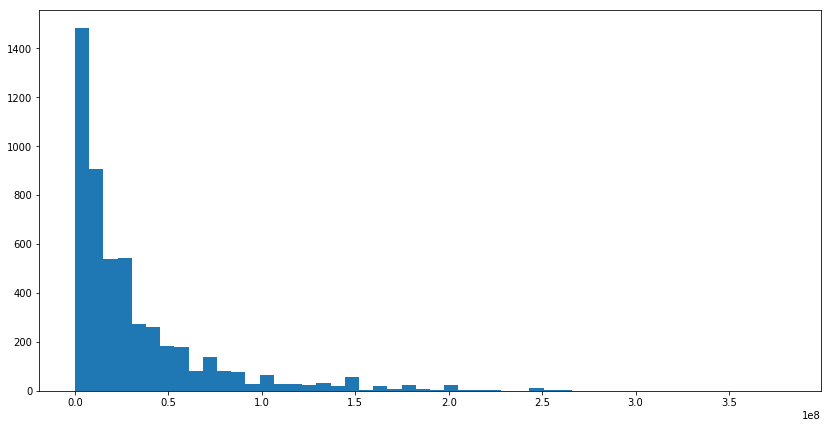

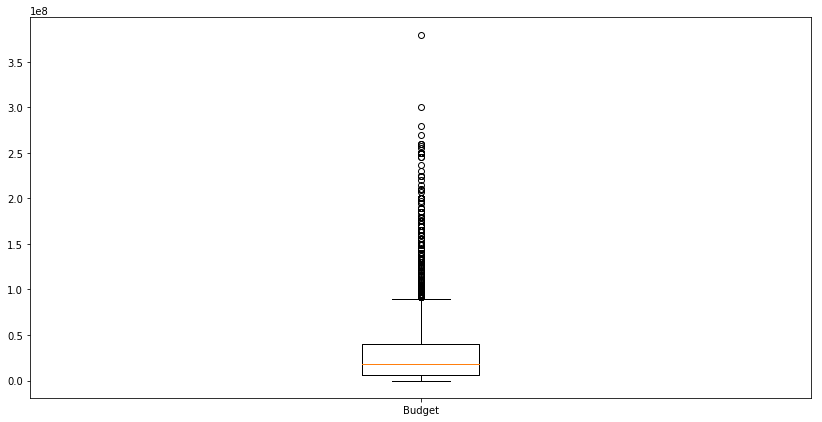

In [21]:
#Budget
movies=movies.sort_values(by='budget')
movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.hist(movies['budget'], bins=50)

plt.figure(figsize=(14,7))
plt.boxplot(movies['budget'])
plt.xticks([1], ['Budget'], rotation='horizontal')

In [22]:
#Removing the outliers

mean_b = np.mean(movies['budget'])
std_b = np.std(movies['budget'])

#print('Budget before removindg outliers: \n', movies['budget'].describe())
print('Min price:', movies['budget'].min())
print('Max price:', movies['budget'].max())
print('Count rows:', movies['budget'].count())
print('Mean: ', round(mean_b))
print('Std:  ', round(std_b))
print('')

#movies new =  mean-3*std < budgets < mean+3*std
movies = movies[(movies['budget']>mean_b-3*std_b)&(movies['budget']<mean_b+3*std_b)]

print('Min price:', movies['budget'].min())
print('Max price:', movies['budget'].max())
print('Count rows:', movies['budget'].count())

Min price: 113
Max price: 380000000
Count rows: 5148
Mean:  32345236
Std:   40602022

Min price: 113
Max price: 152000000
Count rows: 5026


([<matplotlib.axis.XTick at 0x19a816a4358>],
 <a list of 1 Text xticklabel objects>)

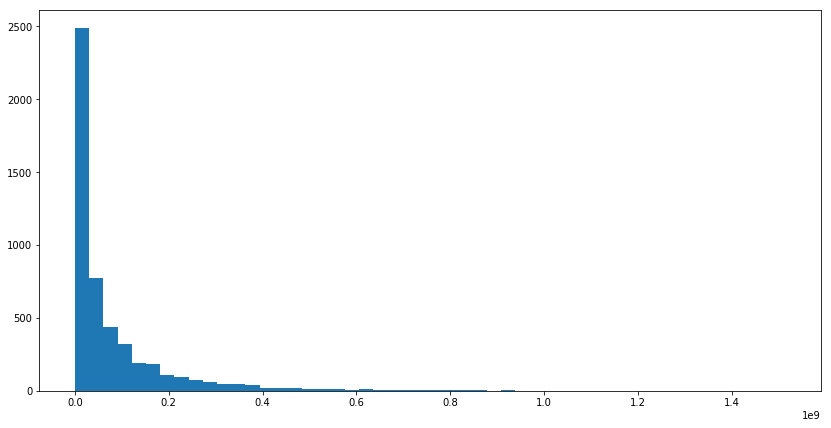

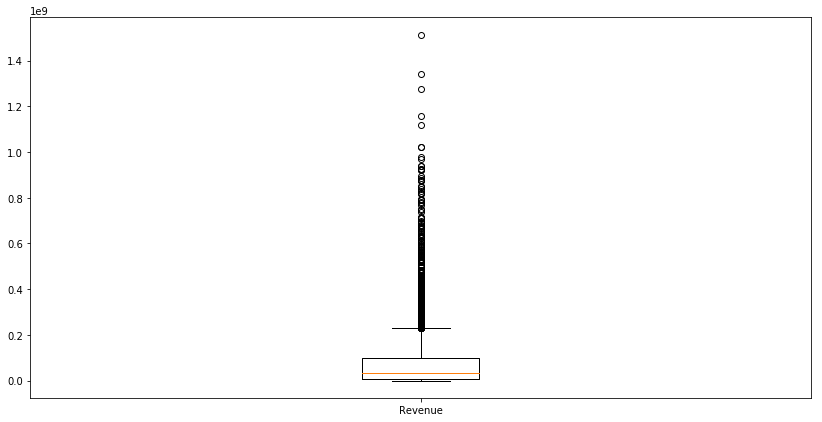

In [23]:
#Revenue
movies=movies.sort_values(by='revenue')
movies.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.hist(movies['revenue'], bins=50)

plt.figure(figsize=(14,7))
plt.boxplot(movies['revenue'])
plt.xticks([1], ['Revenue'], rotation='horizontal')

In [24]:
#Removing the outliers

mean_r = np.mean(movies['revenue'])
std_r = np.std(movies['revenue'])

print('Min revenue:', movies['revenue'].min())
print('Max revenue:', movies['revenue'].max())
print('Count rows:', movies['revenue'].count())
print('Mean: ', round(mean_r))
print('Std:  ', round(std_r))
print('')

#movies new =  mean-3*std < budgets < mean+3*std
movies = movies[(movies['revenue']>mean_r-3*std_r)&(movies['revenue']<mean_r+3*std_r)]

print('Min revenue:', movies['revenue'].min())
print('Max revenue:', movies['revenue'].max())
print('Count rows:', movies['revenue'].count())

Min revenue: 198.0
Max revenue: 1513528810.0
Count rows: 5026
Mean:  80372925
Std:   130179125

Min revenue: 198.0
Max revenue: 470654000.0
Count rows: 4914


In [25]:
movies[:10]

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies
0,57186,Skinning,500000,198.00,2010-10-06,1.02,5.90,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Hypnopolis', 'id': 51316}]"
1,51942,I Married a Strange Person!,250,203.00,1998-08-28,0.82,7.50,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","[{'name': 'Bill Plympton Studios', 'id': 41680}]"
2,70805,Sunday,450,288.00,1997-08-27,0.30,6.30,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'name': 'Sunday Productions', 'id': 40423}, ..."
3,108923,The Mysterious Lady,337,551.00,1928-08-04,0.77,7.50,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...","[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8..."
4,53863,Star of Midnight,280,831.00,1935-04-19,0.11,5.30,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'RKO Radio Pictures', 'id': 6}]"
5,44895,Poor White Trash,1200000,1404.00,2000-06-16,0.58,3.90,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...","[{'name': 'Kingsize Entertainment', 'id': 36242}]"
6,81048,Running Time,130000,1596.00,1997-12-18,0.47,6.20,"[{'id': 80, 'name': 'Crime'}]","[{'name': 'Blood Money Partners LP', 'id': 160..."
7,138222,Best Man Down,1500000,1938.00,2012-10-20,5.88,6.10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'KODA Entertainment', 'id': 16947}]"
8,98339,The Samaritan,12000000,2521.00,2012-03-02,11.52,5.20,"[{'id': 53, 'name': 'Thriller'}]","[{'name': 'Quickfire Films', 'id': 4186}, {'na..."
9,35610,Philadelphia Experiment II,5000000,2970.00,1993-11-12,1.16,5.00,"[{'id': 878, 'name': 'Science Fiction'}]","[{'name': 'Trimark Pictures', 'id': 4063}]"


### Merge the data